In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score

# Q1

In [62]:
data = pd.read_csv('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/ml_hw4/housing.csv')

In [63]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [64]:
mode_value = data['total_bedrooms'].mode()[0]
data.loc[:, 'total_bedrooms'] = data['total_bedrooms'].fillna(mode_value)

In [65]:
train_data, temp_data = train_test_split(data, test_size=0.99, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.99, random_state=42)


X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

X_validation = validation_data.drop('median_house_value', axis=1)
y_validation = validation_data['median_house_value']

X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

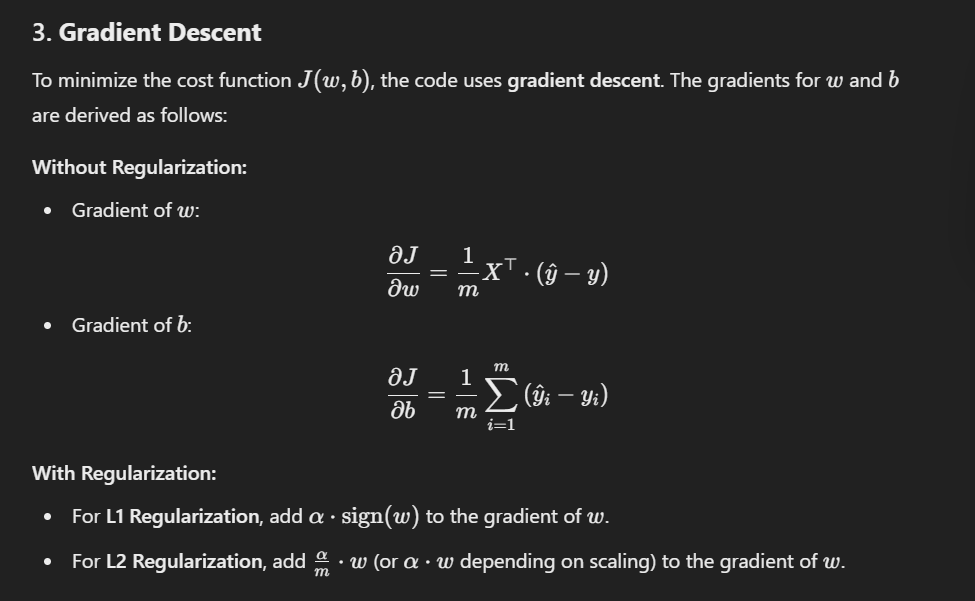

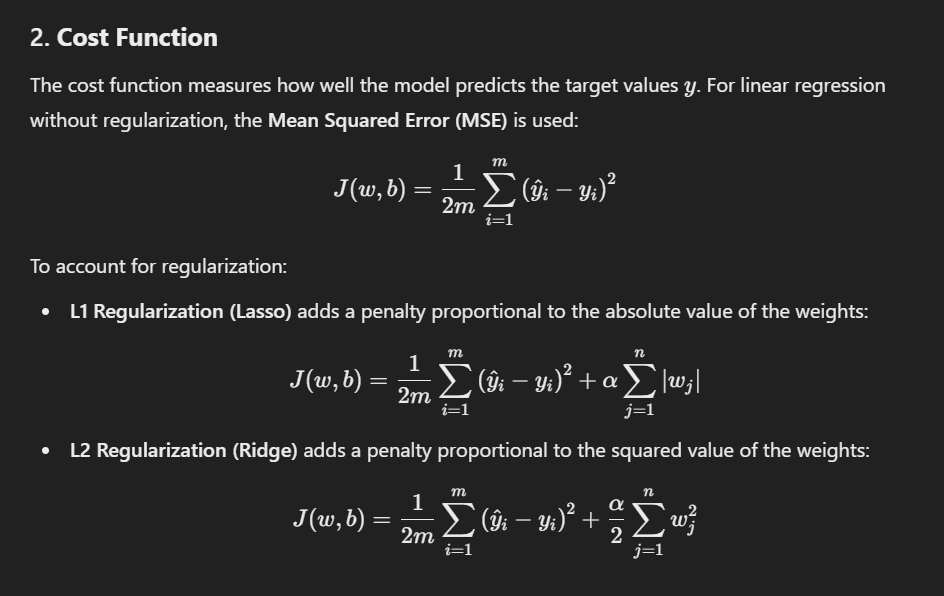

In [66]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=500, penalty=None, alpha=0.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def _cost_function(self, X, y, weights, bias):
        num_samples = X.shape[0]
        predictions = np.dot(X, weights) + bias
        cost = (1 / (2 * num_samples)) * np.sum((predictions - y) ** 2)

        if self.penalty == 'l1':
            cost += self.alpha * np.sum(np.abs(weights))
        elif self.penalty == 'l2':
            cost += (self.alpha / (2 * num_samples)) * np.sum(weights ** 2)

        return cost

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.iterations):
            predictions = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            if self.penalty == 'l1':
                dw += self.alpha * np.sign(self.weights)
            elif self.penalty == 'l2':
                dw += (self.alpha / num_samples) * self.weights

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

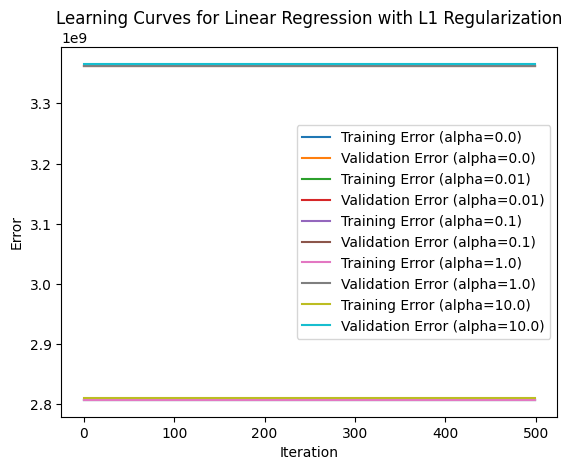

In [ ]:
alphas = [0.0, 0.01, 0.1, 1.0, 10.0]

for alpha in alphas:
    model = LinearRegression(learning_rate=0.01, iterations=500, penalty='l1', alpha=alpha)

    train_errors = []
    validation_errors = []
    coefs = []

    for i in range(model.iterations):
        model.fit(X_train_scaled, y_train)

        train_error = model._cost_function(X_train_scaled, y_train, model.weights, model.bias)
        validation_error = model._cost_function(X_validation_scaled, y_validation, model.weights, model.bias)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        coefs.append(model.weights)

    plt.plot(range(model.iterations), train_errors, label='Training Error (alpha={})'.format(alpha))
    plt.plot(range(model.iterations), validation_errors, label='Validation Error (alpha={})'.format(alpha))

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Learning Curves for Linear Regression with L1 Regularization')
plt.legend()
plt.show()

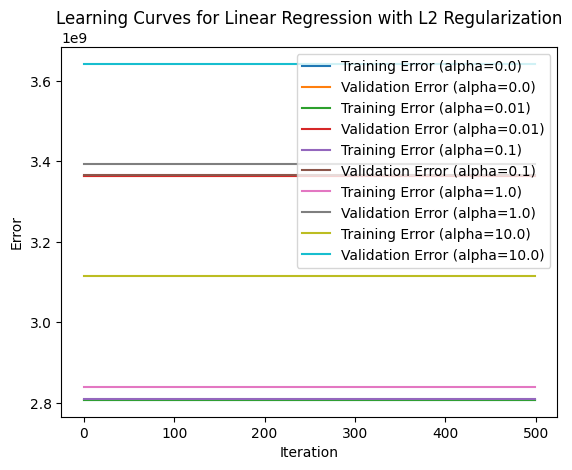

In [ ]:
alphas = [0.0, 0.01, 0.1, 1.0, 10.0]

for alpha in alphas:
    model = LinearRegression(learning_rate=0.01, iterations=500, penalty='l2', alpha=alpha)

    train_errors = []
    validation_errors = []
    coefs = []

    for i in range(model.iterations):
        model.fit(X_train_scaled, y_train)

        train_error = model._cost_function(X_train_scaled, y_train, model.weights, model.bias)
        validation_error = model._cost_function(X_validation_scaled, y_validation, model.weights, model.bias)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        coefs.append(model.weights)

    plt.plot(range(model.iterations), train_errors, label='Training Error (alpha={})'.format(alpha))
    plt.plot(range(model.iterations), validation_errors, label='Validation Error (alpha={})'.format(alpha))

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Learning Curves for Linear Regression with L2 Regularization')
plt.legend()
plt.show()

In [67]:
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

X_validation = validation_data.drop('median_house_value', axis=1)
y_validation = validation_data['median_house_value']

X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train.shape, X_test.shape, X_validation.shape

((12384, 8), (4128, 8), (4128, 8))

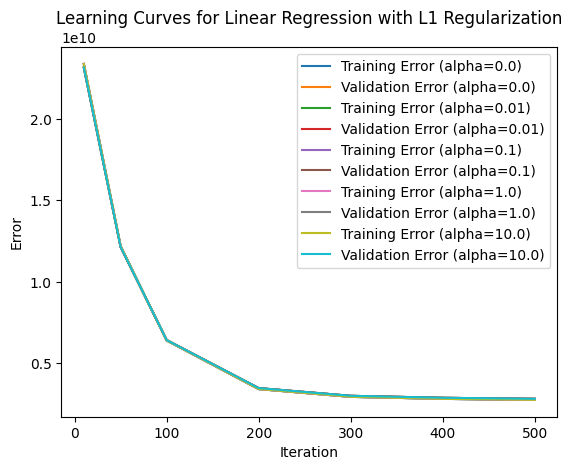

In [ ]:
alphas = [0.0, 0.01, 0.1, 1.0, 10.0]
iterations = [10, 50, 100, 200, 300, 400, 500]

for alpha in alphas:

    train_errors = []
    validation_errors = []
    coefs = []

    for iter in iterations:
        model = LinearRegression(learning_rate=0.01, iterations=iter, penalty='l1', alpha=alpha)
        model.fit(X_train_scaled, y_train)

        train_error = model._cost_function(X_train_scaled, y_train, model.weights, model.bias)
        validation_error = model._cost_function(X_validation_scaled, y_validation, model.weights, model.bias)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        coefs.append(model.weights)

    plt.plot(iterations, train_errors, label='Training Error (alpha={})'.format(alpha))
    plt.plot(iterations, validation_errors, label='Validation Error (alpha={})'.format(alpha))

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Learning Curves for Linear Regression with L1 Regularization')
plt.legend()
plt.show()

In [72]:
X_train_scaled.min()

-2.3703084728101307

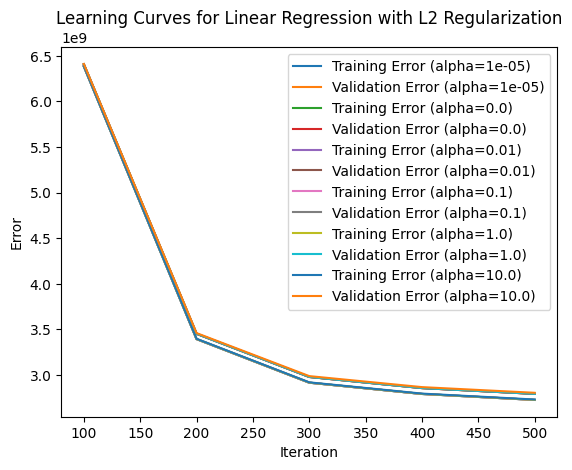

In [69]:
alphas = [1e-5, 0.0, 0.01, 0.1, 1.0, 10.0]
iterations = [100, 200, 300, 400, 500]

for alpha in alphas:

    train_errors = []
    validation_errors = []
    coefs = []

    for iter in iterations:
        model = LinearRegression(learning_rate=0.01, iterations=iter, penalty='l2', alpha=alpha)
        model.fit(X_train_scaled, y_train)

        train_error = model._cost_function(X_train_scaled, y_train, model.weights, model.bias)
        validation_error = model._cost_function(X_validation_scaled, y_validation, model.weights, model.bias)

        train_errors.append(train_error)
        validation_errors.append(validation_error)
        coefs.append(model.weights)

    plt.plot(iterations, train_errors, label='Training Error (alpha={})'.format(alpha))
    plt.plot(iterations, validation_errors, label='Validation Error (alpha={})'.format(alpha))

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Learning Curves for Linear Regression with L2 Regularization')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


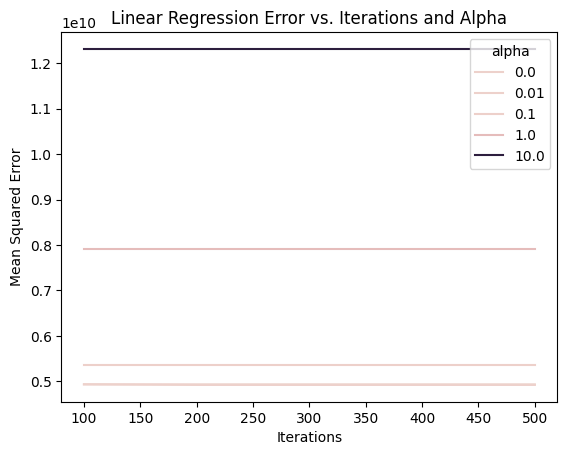

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/ml_hw4/housing.csv')

mode_value = data['total_bedrooms'].mode()[0]
data.loc[:, 'total_bedrooms'] = data['total_bedrooms'].fillna(mode_value)

train_data, temp_data = train_test_split(data, test_size=0.99, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.99, random_state=42)

X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

X_validation = validation_data.drop('median_house_value', axis=1)
y_validation = validation_data['median_house_value']

X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

alphas = [0.0, 0.01, 0.1, 1.0, 10.0]
iterations = [100, 200, 300, 400, 500]

def train_and_evaluate_model(X_train, y_train, X_test, y_test, alpha, iterations):
    model = SGDRegressor(alpha=alpha, max_iter=iterations, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

errors = []
for alpha in alphas:
    for iteration in iterations:
        mse = train_and_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, alpha, iteration)
        errors.append({'alpha': alpha, 'iteration': iteration, 'mse': mse})

errors_df = pd.DataFrame(errors)

sns.lineplot(x='iteration', y='mse', hue='alpha', data=errors_df)
plt.title('Linear Regression Error vs. Iterations and Alpha')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Q2

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/ml_hw4/UCI_Credit_Card.csv')

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
columns_to_drop = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE', 'EDUCATION', 'ID']
data = data.drop(columns=columns_to_drop)

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


X_train = train_data.drop('default.payment.next.month', axis=1)
y_train = train_data['default.payment.next.month']

X_validation = validation_data.drop('default.payment.next.month', axis=1)
y_validation = validation_data['default.payment.next.month']

X_test = test_data.drop('default.payment.next.month', axis=1)
y_test = test_data['default.payment.next.month']


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=100, penalty=None, alpha=0.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _cost_function(self, X, y, weights, bias):
        num_samples = X.shape[0]
        z = np.dot(X, weights) + bias
        predictions = self._sigmoid(z)
        cost = -(1 / num_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

        if self.penalty == 'l1':
            cost += self.alpha * np.sum(np.abs(weights))
        elif self.penalty == 'l2':
            cost += (self.alpha / (2 * num_samples)) * np.sum(weights ** 2)

        return cost

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(z)
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            if self.penalty == 'l1':
                dw += self.alpha * np.sign(self.weights)
            elif self.penalty == 'l2':
                dw += (self.alpha / num_samples) * self.weights

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(z)
        return (predictions >= 0.5).astype(int)

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]

for alpha in alphas:
  model_l1 = LogisticRegression(penalty='l1', alpha=alpha)
  model_l1.fit(X_train_scaled, y_train)
  predictions_l1 = model_l1.predict(X_test_scaled)

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]

for alpha in alphas:
  model_l2 = LogisticRegression(penalty='l2', alpha=alpha)
  model_l2.fit(X_train_scaled, y_train)
  predictions_l2 = model_l2.predict(X_test_scaled)

In [ ]:
def calculate_roc_values(y_true, y_probs):
       thresholds = np.linspace(0, 1, 100)
       tpr_values = []
       fpr_values = []

       for threshold in thresholds:
           y_pred = (y_probs >= threshold).astype(int)
           tp = np.sum((y_true == 1) & (y_pred == 1))
           fp = np.sum((y_true == 0) & (y_pred == 1))
           fn = np.sum((y_true == 1) & (y_pred == 0))
           tn = np.sum((y_true == 0) & (y_pred == 0))

           tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
           fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

           tpr_values.append(tpr)
           fpr_values.append(fpr)

       return tpr_values, fpr_values

alpha =  0.0 [-0.04228823 -0.01179101 -0.009673    0.09858656  0.0718228   0.06060059
  0.05318776  0.04640483  0.04275196 -0.01220888 -0.01050222 -0.01075427
 -0.01066143 -0.00984579 -0.00878508]
alpha =  0.1 [-1.47155662e-03  5.08443434e-04  4.72120779e-04  3.00722655e-02
  7.10913454e-03  3.70048684e-04  6.18879361e-04  6.92689903e-04
  6.70048164e-04  6.98107002e-04 -9.91574242e-04  6.52639965e-04
 -9.60492865e-04  4.84729890e-05 -8.78187216e-04]
alpha =  1.0 [ 0.00605315 -0.0069438   0.00144619  0.00325569 -0.00063168  0.00807556
  0.00010729 -0.00800804  0.00576686  0.00010037  0.00238022  0.00194255
  0.00229591  0.0032851   0.00433607]
alpha =  10 [ 0.02461053  0.07571527  0.08328489  0.0291134   0.00319321 -0.00813936
 -0.01602964 -0.02435017 -0.03063721  0.05988238  0.06147198  0.06111911
  0.0612703   0.06261874  0.06428996]
alpha =  100 [ 0.8501162   0.94621166  0.96977759 -0.81830213 -0.83337067 -0.8430846
 -0.85371128 -0.86578342 -0.87696274  0.92460334  0.92736135  0.927

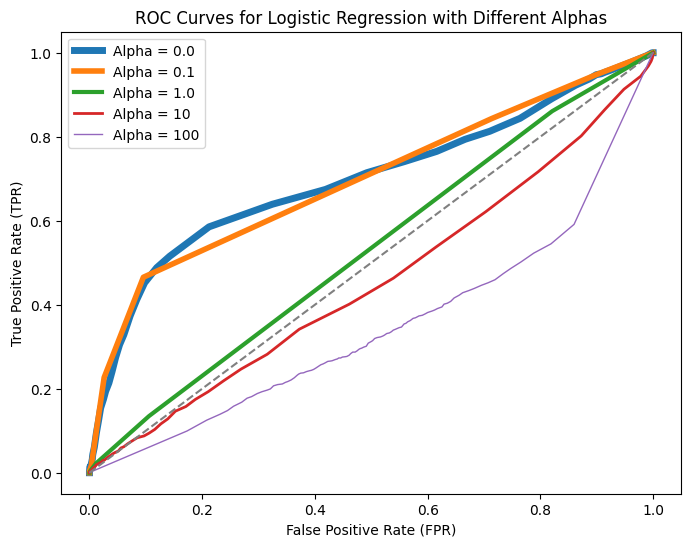

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]
linewidths = [5, 4, 3, 2, 1]
plt.figure(figsize=(8, 6))

for alpha, linewidth in zip(alphas, linewidths):
    model = LogisticRegression(penalty='l1', alpha=alpha)
    model.fit(X_train_scaled, y_train)
    print("alpha = ", alpha, model.weights)
    y_probs = model._sigmoid(np.dot(X_test_scaled, model.weights) + model.bias)

    tpr_values, fpr_values = calculate_roc_values(y_test, y_probs)

    plt.plot(fpr_values, tpr_values, label=f'Alpha = {alpha}', linewidth=linewidth)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression with Different Alphas')
plt.legend()
plt.show()

alpha =  0.0 [-0.04228823 -0.01179101 -0.009673    0.09858656  0.0718228   0.06060059
  0.05318776  0.04640483  0.04275196 -0.01220888 -0.01050222 -0.01075427
 -0.01066143 -0.00984579 -0.00878508]
alpha =  0.1 [-0.04228813 -0.01179098 -0.00967298  0.09858631  0.07182263  0.06060045
  0.05318764  0.04640473  0.04275187 -0.01220885 -0.01050219 -0.01075424
 -0.0106614  -0.00984576 -0.00878505]
alpha =  1.0 [-0.04228723 -0.01179072 -0.00967273  0.0985841   0.0718211   0.06059919
  0.05318656  0.04640381  0.04275102 -0.01220854 -0.01050191 -0.01075396
 -0.01066112 -0.00984551 -0.00878482]
alpha =  10 [-0.04227822 -0.01178813 -0.00967026  0.09856194  0.07180575  0.06058659
  0.05317573  0.04639457  0.04274252 -0.01220544 -0.0104992  -0.0107512
 -0.01065837 -0.00984294 -0.00878251]
alpha =  100 [-0.04218833 -0.01176223 -0.00964566  0.09834075  0.07165253  0.0604608
  0.05306764  0.04630232  0.04265771 -0.01217452 -0.01047213 -0.01072361
 -0.01063084 -0.00981729 -0.00875946]


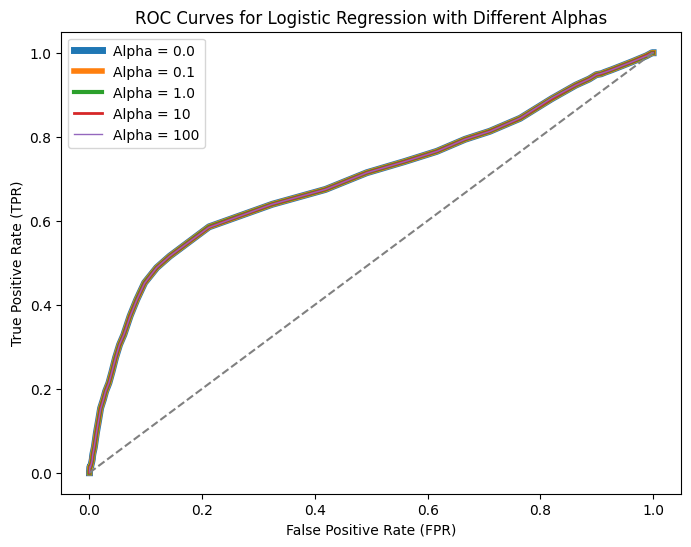

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]
linewidths = [5, 4, 3, 2, 1]
plt.figure(figsize=(8, 6))

for alpha, linewidth in zip(alphas, linewidths):
    model = LogisticRegression(penalty='l2', alpha=alpha)
    model.fit(X_train_scaled, y_train)
    print("alpha = ", alpha, model.weights)
    y_probs = model._sigmoid(np.dot(X_test_scaled, model.weights) + model.bias)

    tpr_values, fpr_values = calculate_roc_values(y_test, y_probs)

    plt.plot(fpr_values, tpr_values, label=f'Alpha = {alpha}', linewidth=linewidth)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression with Different Alphas')
plt.legend()
plt.show()

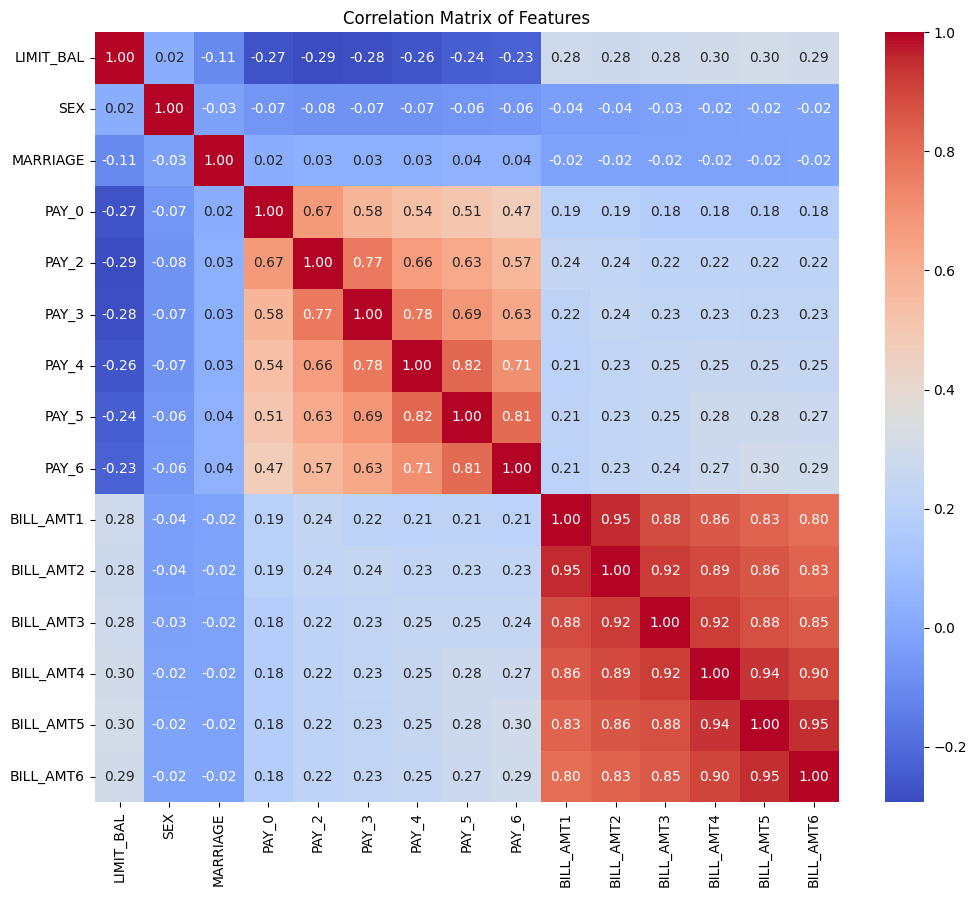

In [ ]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

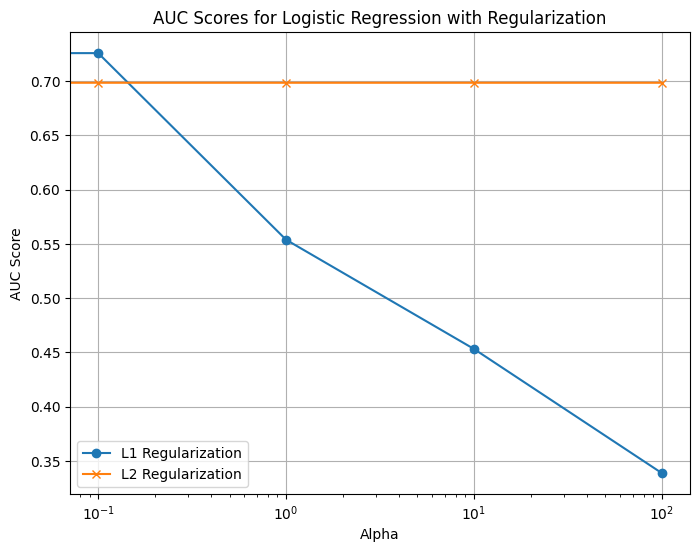

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]
auc_scores_l1 = []
auc_scores_l2 = []

for alpha in alphas:
    model_l1 = LogisticRegression(penalty='l1', alpha=alpha)
    model_l1.fit(X_train_scaled, y_train)
    y_probs_l1 = model_l1._sigmoid(np.dot(X_test_scaled, model_l1.weights) + model_l1.bias)
    fpr_l1, tpr_l1, _ = roc_curve(y_test, y_probs_l1)
    roc_auc_l1 = auc(fpr_l1, tpr_l1)
    auc_scores_l1.append(roc_auc_l1)

    model_l2 = LogisticRegression(penalty='l2', alpha=alpha)
    model_l2.fit(X_train_scaled, y_train)
    y_probs_l2 = model_l2._sigmoid(np.dot(X_test_scaled, model_l2.weights) + model_l2.bias)
    fpr_l2, tpr_l2, _ = roc_curve(y_test, y_probs_l2)
    roc_auc_l2 = auc(fpr_l2, tpr_l2)
    auc_scores_l2.append(roc_auc_l2)

plt.figure(figsize=(8, 6))
plt.plot(alphas, auc_scores_l1, marker='o', label='L1 Regularization')
plt.plot(alphas, auc_scores_l2, marker='x', label='L2 Regularization')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Logistic Regression with Regularization')
plt.legend()
plt.grid(True)
plt.show()

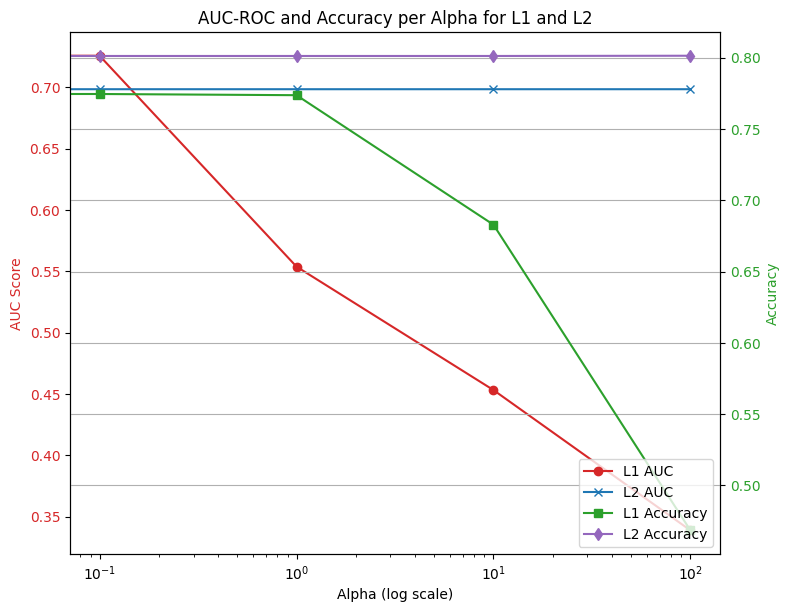

In [ ]:
alphas = [0.0, 0.1, 1.0, 10, 100]
auc_scores_l1 = []
auc_scores_l2 = []
accuracy_scores_l1 = []
accuracy_scores_l2 = []

for alpha in alphas:
    model_l1 = LogisticRegression(penalty='l1', alpha=alpha)
    model_l1.fit(X_train_scaled, y_train)
    y_probs_l1 = model_l1._sigmoid(np.dot(X_test_scaled, model_l1.weights) + model_l1.bias)
    fpr_l1, tpr_l1, _ = roc_curve(y_test, y_probs_l1)
    roc_auc_l1 = auc(fpr_l1, tpr_l1)
    auc_scores_l1.append(roc_auc_l1)
    y_pred_l1 = model_l1.predict(X_test_scaled)
    accuracy_l1 = accuracy_score(y_test, y_pred_l1)
    accuracy_scores_l1.append(accuracy_l1)

    model_l2 = LogisticRegression(penalty='l2', alpha=alpha)
    model_l2.fit(X_train_scaled, y_train)
    y_probs_l2 = model_l2._sigmoid(np.dot(X_test_scaled, model_l2.weights) + model_l2.bias)
    fpr_l2, tpr_l2, _ = roc_curve(y_test, y_probs_l2)
    roc_auc_l2 = auc(fpr_l2, tpr_l2)
    auc_scores_l2.append(roc_auc_l2)
    y_pred_l2 = model_l2.predict(X_test_scaled)
    accuracy_l2 = accuracy_score(y_test, y_pred_l2)
    accuracy_scores_l2.append(accuracy_l2)

fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'
ax1.set_xlabel('Alpha (log scale)')
ax1.set_ylabel('AUC Score', color=color)
ax1.plot(alphas, auc_scores_l1, marker='o', label='L1 AUC', color=color)
ax1.plot(alphas, auc_scores_l2, marker='x', label='L2 AUC', color='tab:blue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(alphas, accuracy_scores_l1, marker='s', label='L1 Accuracy', color=color)
ax2.plot(alphas, accuracy_scores_l2, marker='d', label='L2 Accuracy', color='tab:purple')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

fig.tight_layout()
plt.title('AUC-ROC and Accuracy per Alpha for L1 and L2')
plt.grid(True)
plt.show()